In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
import json 

data_saison = json.load(open("season_match_stats.json"))

In [2]:
table = []

for index, value in data_saison.items():
    ligne = [index] + list(value.values())  
    table.append(ligne)
    
df_saison = pd.DataFrame(table, columns = ['id_match', 'home_team_id', 'away_team_id', 'home_team_name', 'away_team_name', 'date_string', 'half_time_score', 'full_time_score'])
df_saison.head()

,id_match,home_team_id,away_team_id,home_team_name,away_team_name,date_string,half_time_score,full_time_score
0,1190418,166,26,Huddersfield,Liverpool,30/01/2018 20:00:00,0 : 2,0 : 3
1,1190424,211,183,Brighton,Bournemouth,01/01/2018 12:30:00,1 : 1,2 : 2
2,1190342,15,14,Chelsea,Leicester,13/01/2018 15:00:00,0 : 0,0 : 0
3,1190356,26,259,Liverpool,Swansea,26/12/2017 17:30:00,1 : 0,5 : 0
4,1190430,15,183,Chelsea,Bournemouth,31/01/2018 19:45:00,0 : 0,0 : 3


In [5]:
data_match = json.load(open("season_stats.json",encoding='utf-8'))

In [7]:
table = []

for index, value in data_match.items():
    home = dict(list(value.values())[0])
    ligne = [index] + list(home['team_details'].values())  
    table.append(ligne)
    
df_match_home = pd.DataFrame(table, columns = ['id_match', 'team_id_home', 'team_name_home', 'team_rating_home', 'date'])


In [8]:
compteur = 0
for index, value in data_match.items():
    home = dict(list(value.values())[0])
    
    for i,j in home['aggregate_stats'].items() :
        df_match_home.loc[compteur, i] = j
         
    compteur += 1
    
print("dataframe des equipes à domicile :")    
df_match_home.head()

dataframe des equipes à domicile :


,id_match,team_id_home,team_name_home,team_rating_home,date,fk_foul_lost,won_contest,possession_percentage,total_throws,att_miss_high_left,blocked_scoring_att,total_scoring_att,att_sv_low_left,total_tackle,att_miss_high_right,aerial_won,att_miss_right,att_sv_low_centre,att_miss_high,aerial_lost,att_sv_low_right,total_pass,won_corners,shot_off_target,ontarget_scoring_att,goals,att_miss_left,att_goal_low_left,total_offside,att_sv_high_centre,accurate_pass,att_goal_high_left,att_goal_low_centre,att_sv_high_left,att_sv_high_right,att_goal_high_centre,att_goal_low_right,att_post_right,post_scoring_att,att_post_high,att_goal_high_right,att_post_left,att_pen_goal,penalty_save
0,1190174,13,Arsenal,7.30714285714286,11/08/2017,9,16,70,21,1,8,27,1,23,2,18,3,2,1,18,2,632,9,9,10,4,2,2,5,1,538,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1190175,211,Brighton,6.30857142857143,12/08/2017,6,7,21.8,18,NaN,2,6,NaN,10,NaN,13,1,1,NaN,13,NaN,213,3,2,2,NaN,1,NaN,6,1,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1190176,15,Chelsea,6.39642857142857,12/08/2017,16,5,61.9,13,1,7,19,NaN,10,2,17,1,2,NaN,22,NaN,521,8,6,6,2,2,1,2,NaN,446,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1190177,162,Crystal Palace,6.53615384615385,12/08/2017,7,18,56.7,19,NaN,3,14,2,24,NaN,18,1,2,4,16,NaN,391,12,7,4,NaN,2,NaN,NaN,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1190178,31,Everton,6.99357142857143,12/08/2017,13,1,61.6,24,NaN,2,9,1,17,1,19,NaN,1,NaN,25,NaN,497,6,3,4,1,2,NaN,2,1,392,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
table = []

for index, value in data_match.items():
    away = dict(list(value.values())[1])
    ligne = [index] + list(away['team_details'].values())  
    table.append(ligne)
    
df_match_away = pd.DataFrame(table, columns = ['id_match', 'team_id_away', 'team_name_away', 'team_rating_away', 'date'])

In [10]:
compteur = 0
for index, value in data_match.items():
    away = dict(list(value.values())[1])
    
    for i,j in away['aggregate_stats'].items() :
        df_match_away.loc[compteur, i] = j
         
    compteur += 1
    
print("dataframe des equipes à l'extérieur :")    
df_match_away.head()

dataframe des equipes à l'extérieur :


,id_match,team_id_away,team_name_away,team_rating_away,date,won_corners,fk_foul_lost,won_contest,total_tackle,aerial_lost,possession_percentage,att_goal_high_centre,att_goal_low_left,total_pass,total_throws,total_offside,shot_off_target,ontarget_scoring_att,aerial_won,att_miss_high,accurate_pass,att_miss_left,att_miss_right,total_scoring_att,goals,blocked_scoring_att,att_post_left,post_scoring_att,att_miss_high_right,att_sv_low_centre,att_sv_low_right,att_goal_high_right,att_sv_high_centre,att_goal_high_left,att_sv_low_left,att_post_high,att_goal_low_centre,att_goal_low_right,att_sv_high_left,att_pen_goal,att_miss_high_left,att_sv_high_right,att_post_right,penalty_save
0,1190174,14,Leicester,6.64642857142857,11/08/2017,4,12,5,17,18,30,2,1,263,31,3,3,3,18,1,167,1,1,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1190175,167,Manchester City,6.90285714285714,12/08/2017,10,9,6,10,13,78.2,NaN,1,768,17,1,5,4,13,NaN,691,NaN,2,14,2,5,1,1,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1190176,184,Burnley,7.05230769230769,12/08/2017,5,11,2,8,17,38.1,NaN,1,320,7,1,4,5,22,NaN,241,2,1,10,3,1,1,1,NaN,1,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1190177,166,Huddersfield,7.23357142857143,12/08/2017,9,19,5,28,18,43.3,NaN,NaN,306,30,2,3,6,16,1,199,2,NaN,9,3,NaN,NaN,NaN,NaN,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1190178,96,Stoke,6.60615384615385,12/08/2017,7,10,10,18,19,38.4,NaN,NaN,292,27,6,6,1,25,1,211,3,2,9,NaN,2,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# YD - À partir de là c'est ce que j'ai fait

df_1718 = pd.merge(df_match_home,df_match_away,how='left',on='id_match')
df_1718.head()

,id_match,team_id_home,team_name_home,team_rating_home,date_x,fk_foul_lost_x,won_contest_x,possession_percentage_x,total_throws_x,att_miss_high_left_x,blocked_scoring_att_x,total_scoring_att_x,att_sv_low_left_x,total_tackle_x,att_miss_high_right_x,aerial_won_x,att_miss_right_x,att_sv_low_centre_x,att_miss_high_x,aerial_lost_x,att_sv_low_right_x,total_pass_x,won_corners_x,shot_off_target_x,ontarget_scoring_att_x,goals_x,att_miss_left_x,att_goal_low_left_x,total_offside_x,att_sv_high_centre_x,accurate_pass_x,att_goal_high_left_x,att_goal_low_centre_x,att_sv_high_left_x,att_sv_high_right_x,att_goal_high_centre_x,att_goal_low_right_x,att_post_right_x,post_scoring_att_x,att_post_high_x,att_goal_high_right_x,att_post_left_x,att_pen_goal_x,penalty_save_x,team_id_away,team_name_away,team_rating_away,date_y,won_corners_y,fk_foul_lost_y,won_contest_y,total_tackle_y,aerial_lost_y,possession_percentage_y,att_goal_high_centre_y,att_goal_low_left_y,total_pass_y,total_throws_y,total_offside_y,shot_off_target_y,ontarget_scoring_att_y,aerial_won_y,att_miss_high_y,accurate_pass_y,att_miss_left_y,att_miss_right_y,total_scoring_att_y,goals_y,blocked_scoring_att_y,att_post_left_y,post_scoring_att_y,att_miss_high_right_y,att_sv_low_centre_y,att_sv_low_right_y,att_goal_high_right_y,att_sv_high_centre_y,att_goal_high_left_y,att_sv_low_left_y,att_post_high_y,att_goal_low_centre_y,att_goal_low_right_y,att_sv_high_left_y,att_pen_goal_y,att_miss_high_left_y,att_sv_high_right_y,att_post_right_y,penalty_save_y
0,1190174,13,Arsenal,7.30714285714286,11/08/2017,9,16,70,21,1,8,27,1,23,2,18,3,2,1,18,2,632,9,9,10,4,2,2,5,1,538,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,Leicester,6.64642857142857,11/08/2017,4,12,5,17,18,30,2,1,263,31,3,3,3,18,1,167,1,1,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1190175,211,Brighton,6.30857142857143,12/08/2017,6,7,21.8,18,NaN,2,6,NaN,10,NaN,13,1,1,NaN,13,NaN,213,3,2,2,NaN,1,NaN,6,1,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167,Manchester City,6.90285714285714,12/08/2017,10,9,6,10,13,78.2,NaN,1,768,17,1,5,4,13,NaN,691,NaN,2,14,2,5,1,1,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1190176,15,Chelsea,6.39642857142857,12/08/2017,16,5,61.9,13,1,7,19,NaN,10,2,17,1,2,NaN,22,NaN,521,8,6,6,2,2,1,2,NaN,446,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184,Burnley,7.05230769230769,12/08/2017,5,11,2,8,17,38.1,NaN,1,320,7,1,4,5,22,NaN,241,2,1,10,3,1,1,1,NaN,1,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1190177,162,Crystal Palace,6.53615384615385,12/08/2017,7,18,56.7,19,NaN,3,14,2,24,NaN,18,1,2,4,16,NaN,391,12,7,4,NaN,2,NaN,NaN,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166,Huddersfield,7.23357142857143,12/08/2017,9,19,5,28,18,43.3,NaN,NaN,306,30,2,3,6,16,1,199,2,NaN,9,3,NaN,NaN,NaN,NaN,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1190178,31,Everton,6.99357142857143,12/08/2017,13,1,61.6,24,NaN,2,9,1,17,1,19,NaN,1,NaN,25,NaN,497,6,3,4,1,2,NaN,2,1,392,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,Stoke,6.60615384615385,12/08/2017,7,10,10,18,19,38.4,NaN,NaN,292,27,6,6,1,25,1,211,3,2,9,NaN,2,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_1718 = df_1718.fillna(0)
df_1718 = df_1718.sort_values(by='id_match',ascending=True)
df_1718.head()


,id_match,team_id_home,team_name_home,team_rating_home,date_x,fk_foul_lost_x,won_contest_x,possession_percentage_x,total_throws_x,att_miss_high_left_x,blocked_scoring_att_x,total_scoring_att_x,att_sv_low_left_x,total_tackle_x,att_miss_high_right_x,aerial_won_x,att_miss_right_x,att_sv_low_centre_x,att_miss_high_x,aerial_lost_x,att_sv_low_right_x,total_pass_x,won_corners_x,shot_off_target_x,ontarget_scoring_att_x,goals_x,att_miss_left_x,att_goal_low_left_x,total_offside_x,att_sv_high_centre_x,accurate_pass_x,att_goal_high_left_x,att_goal_low_centre_x,att_sv_high_left_x,att_sv_high_right_x,att_goal_high_centre_x,att_goal_low_right_x,att_post_right_x,post_scoring_att_x,att_post_high_x,att_goal_high_right_x,att_post_left_x,att_pen_goal_x,penalty_save_x,team_id_away,team_name_away,team_rating_away,date_y,won_corners_y,fk_foul_lost_y,won_contest_y,total_tackle_y,aerial_lost_y,possession_percentage_y,att_goal_high_centre_y,att_goal_low_left_y,total_pass_y,total_throws_y,total_offside_y,shot_off_target_y,ontarget_scoring_att_y,aerial_won_y,att_miss_high_y,accurate_pass_y,att_miss_left_y,att_miss_right_y,total_scoring_att_y,goals_y,blocked_scoring_att_y,att_post_left_y,post_scoring_att_y,att_miss_high_right_y,att_sv_low_centre_y,att_sv_low_right_y,att_goal_high_right_y,att_sv_high_centre_y,att_goal_high_left_y,att_sv_low_left_y,att_post_high_y,att_goal_low_centre_y,att_goal_low_right_y,att_sv_high_left_y,att_pen_goal_y,att_miss_high_left_y,att_sv_high_right_y,att_post_right_y,penalty_save_y
0,1190174,13,Arsenal,7.30714285714286,11/08/2017,9,16,70,21,1,8,27,1,23,2,18,3,2,1,18,2,632,9,9,10,4,2,2,5,1,538,1,1,0,0,0,0,0,0,0,0,0,0,0,14,Leicester,6.64642857142857,11/08/2017,4,12,5,17,18,30,2,1,263,31,3,3,3,18,1,167,1,1,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1190175,211,Brighton,6.30857142857143,12/08/2017,6,7,21.8,18,0,2,6,0,10,0,13,1,1,0,13,0,213,3,2,2,0,1,0,6,1,130,0,0,0,0,0,0,0,0,0,0,0,0,0,167,Manchester City,6.90285714285714,12/08/2017,10,9,6,10,13,78.2,0,1,768,17,1,5,4,13,0,691,0,2,14,2,5,1,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1190176,15,Chelsea,6.39642857142857,12/08/2017,16,5,61.9,13,1,7,19,0,10,2,17,1,2,0,22,0,521,8,6,6,2,2,1,2,0,446,0,1,1,1,0,0,0,0,0,0,0,0,0,184,Burnley,7.05230769230769,12/08/2017,5,11,2,8,17,38.1,0,1,320,7,1,4,5,22,0,241,2,1,10,3,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1190177,162,Crystal Palace,6.53615384615385,12/08/2017,7,18,56.7,19,0,3,14,2,24,0,18,1,2,4,16,0,391,12,7,4,0,2,0,0,0,304,0,0,0,0,0,0,0,0,0,0,0,0,0,166,Huddersfield,7.23357142857143,12/08/2017,9,19,5,28,18,43.3,0,0,306,30,2,3,6,16,1,199,2,0,9,3,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
4,1190178,31,Everton,6.99357142857143,12/08/2017,13,1,61.6,24,0,2,9,1,17,1,19,0,1,0,25,0,497,6,3,4,1,2,0,2,1,392,0,0,0,0,1,0,0,0,0,0,0,0,0,96,Stoke,6.60615384615385,12/08/2017,7,10,10,18,19,38.4,0,0,292,27,6,6,1,25,1,211,3,2,9,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Changement des types des colonnes 
cols=[i for i in df_1718.columns if i not in ["team_name_home","team_rating_home","date_x",'possession_percentage_x','team_name_away','team_rating_away','date_y','possession_percentage_y']]
for column in cols:
    df_1718[column] = df_1718[column].astype(int)

cols=[i for i in df_1718.columns if i in ["team_name_home","date_x",'team_name_away','date_y']]
for column in cols:
    df_1718[column] = df_1718[column].apply(str)
    
cols=[i for i in df_1718.columns if i in ["team_rating_home",'possession_percentage_x','team_rating_away','possession_percentage_y']]
for column in cols:
    df_1718[column] = df_1718[column].apply(float)
    
df_1718.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_match                 170 non-null    int32  
 1   team_id_home             170 non-null    int32  
 2   team_name_home           170 non-null    object 
 3   team_rating_home         170 non-null    float64
 4   date_x                   170 non-null    object 
 5   fk_foul_lost_x           170 non-null    int32  
 6   won_contest_x            170 non-null    int32  
 7   possession_percentage_x  170 non-null    float64
 8   total_throws_x           170 non-null    int32  
 9   att_miss_high_left_x     170 non-null    int32  
 10  blocked_scoring_att_x    170 non-null    int32  
 11  total_scoring_att_x      170 non-null    int32  
 12  att_sv_low_left_x        170 non-null    int32  
 13  total_tackle_x           170 non-null    int32  
 14  att_miss_high_right_x    1

In [14]:
df_score=df_1718[['id_match','team_name_home','goals_x','goals_y','team_name_away']]
df_score.head()

df_score.insert(5,'winner',np.linspace(0,0,len(df_score['team_name_home'])))


# Ajout d'une colonne winner
for i in df_score['team_name_home'].index:
    
    if(df_score['goals_x'][i] > df_score['goals_y'][i]):
        df_score['winner'][i]=0#df_score['team_name_home'][i]  :  équivaut à 
    elif(df_score['goals_x'][i]  < df_score['goals_y'][i]):
        df_score['winner'][i]=1#df_score['team_name_away'][i]
    else:
        df_score['winner'][i]=2#'draw'
df_score.head(20)

<ipython-input-14-508abcf15e43>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['winner'][i]=0#df_score['team_name_home'][i]  :  équivaut à
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-14-508abcf15e43>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['winner'][i]=1#df_s

,id_match,team_name_home,goals_x,goals_y,team_name_away,winner
0,1190174,Arsenal,4,3,Leicester,0.0
1,1190175,Brighton,0,2,Manchester City,1.0
2,1190176,Chelsea,2,3,Burnley,1.0
3,1190177,Crystal Palace,0,3,Huddersfield,1.0
4,1190178,Everton,1,0,Stoke,0.0
5,1190179,Manchester United,4,0,West Ham,0.0
6,1190180,Newcastle United,0,2,Tottenham,1.0
7,1190181,Southampton,0,0,Swansea,2.0
8,1190182,Watford,3,3,Liverpool,2.0
9,1190183,West Bromwich Albion,1,0,Bournemouth,0.0


In [15]:
df_1718.head()

,id_match,team_id_home,team_name_home,team_rating_home,date_x,fk_foul_lost_x,won_contest_x,possession_percentage_x,total_throws_x,att_miss_high_left_x,blocked_scoring_att_x,total_scoring_att_x,att_sv_low_left_x,total_tackle_x,att_miss_high_right_x,aerial_won_x,att_miss_right_x,att_sv_low_centre_x,att_miss_high_x,aerial_lost_x,att_sv_low_right_x,total_pass_x,won_corners_x,shot_off_target_x,ontarget_scoring_att_x,goals_x,att_miss_left_x,att_goal_low_left_x,total_offside_x,att_sv_high_centre_x,accurate_pass_x,att_goal_high_left_x,att_goal_low_centre_x,att_sv_high_left_x,att_sv_high_right_x,att_goal_high_centre_x,att_goal_low_right_x,att_post_right_x,post_scoring_att_x,att_post_high_x,att_goal_high_right_x,att_post_left_x,att_pen_goal_x,penalty_save_x,team_id_away,team_name_away,team_rating_away,date_y,won_corners_y,fk_foul_lost_y,won_contest_y,total_tackle_y,aerial_lost_y,possession_percentage_y,att_goal_high_centre_y,att_goal_low_left_y,total_pass_y,total_throws_y,total_offside_y,shot_off_target_y,ontarget_scoring_att_y,aerial_won_y,att_miss_high_y,accurate_pass_y,att_miss_left_y,att_miss_right_y,total_scoring_att_y,goals_y,blocked_scoring_att_y,att_post_left_y,post_scoring_att_y,att_miss_high_right_y,att_sv_low_centre_y,att_sv_low_right_y,att_goal_high_right_y,att_sv_high_centre_y,att_goal_high_left_y,att_sv_low_left_y,att_post_high_y,att_goal_low_centre_y,att_goal_low_right_y,att_sv_high_left_y,att_pen_goal_y,att_miss_high_left_y,att_sv_high_right_y,att_post_right_y,penalty_save_y
0,1190174,13,Arsenal,7.307143,11/08/2017,9,16,70.0,21,1,8,27,1,23,2,18,3,2,1,18,2,632,9,9,10,4,2,2,5,1,538,1,1,0,0,0,0,0,0,0,0,0,0,0,14,Leicester,6.646429,11/08/2017,4,12,5,17,18,30.0,2,1,263,31,3,3,3,18,1,167,1,1,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1190175,211,Brighton,6.308571,12/08/2017,6,7,21.8,18,0,2,6,0,10,0,13,1,1,0,13,0,213,3,2,2,0,1,0,6,1,130,0,0,0,0,0,0,0,0,0,0,0,0,0,167,Manchester City,6.902857,12/08/2017,10,9,6,10,13,78.2,0,1,768,17,1,5,4,13,0,691,0,2,14,2,5,1,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1190176,15,Chelsea,6.396429,12/08/2017,16,5,61.9,13,1,7,19,0,10,2,17,1,2,0,22,0,521,8,6,6,2,2,1,2,0,446,0,1,1,1,0,0,0,0,0,0,0,0,0,184,Burnley,7.052308,12/08/2017,5,11,2,8,17,38.1,0,1,320,7,1,4,5,22,0,241,2,1,10,3,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1190177,162,Crystal Palace,6.536154,12/08/2017,7,18,56.7,19,0,3,14,2,24,0,18,1,2,4,16,0,391,12,7,4,0,2,0,0,0,304,0,0,0,0,0,0,0,0,0,0,0,0,0,166,Huddersfield,7.233571,12/08/2017,9,19,5,28,18,43.3,0,0,306,30,2,3,6,16,1,199,2,0,9,3,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
4,1190178,31,Everton,6.993571,12/08/2017,13,1,61.6,24,0,2,9,1,17,1,19,0,1,0,25,0,497,6,3,4,1,2,0,2,1,392,0,0,0,0,1,0,0,0,0,0,0,0,0,96,Stoke,6.606154,12/08/2017,7,10,10,18,19,38.4,0,0,292,27,6,6,1,25,1,211,3,2,9,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
#ajout de la colonne winner sur df_1718
df_1718 = pd.merge(df_1718,df_score[['id_match','winner']], how='left', on='id_match')
df_1718.head()

,id_match,team_id_home,team_name_home,team_rating_home,date_x,fk_foul_lost_x,won_contest_x,possession_percentage_x,total_throws_x,att_miss_high_left_x,blocked_scoring_att_x,total_scoring_att_x,att_sv_low_left_x,total_tackle_x,att_miss_high_right_x,aerial_won_x,att_miss_right_x,att_sv_low_centre_x,att_miss_high_x,aerial_lost_x,att_sv_low_right_x,total_pass_x,won_corners_x,shot_off_target_x,ontarget_scoring_att_x,goals_x,att_miss_left_x,att_goal_low_left_x,total_offside_x,att_sv_high_centre_x,accurate_pass_x,att_goal_high_left_x,att_goal_low_centre_x,att_sv_high_left_x,att_sv_high_right_x,att_goal_high_centre_x,att_goal_low_right_x,att_post_right_x,post_scoring_att_x,att_post_high_x,att_goal_high_right_x,att_post_left_x,att_pen_goal_x,penalty_save_x,team_id_away,team_name_away,team_rating_away,date_y,won_corners_y,fk_foul_lost_y,won_contest_y,total_tackle_y,aerial_lost_y,possession_percentage_y,att_goal_high_centre_y,att_goal_low_left_y,total_pass_y,total_throws_y,total_offside_y,shot_off_target_y,ontarget_scoring_att_y,aerial_won_y,att_miss_high_y,accurate_pass_y,att_miss_left_y,att_miss_right_y,total_scoring_att_y,goals_y,blocked_scoring_att_y,att_post_left_y,post_scoring_att_y,att_miss_high_right_y,att_sv_low_centre_y,att_sv_low_right_y,att_goal_high_right_y,att_sv_high_centre_y,att_goal_high_left_y,att_sv_low_left_y,att_post_high_y,att_goal_low_centre_y,att_goal_low_right_y,att_sv_high_left_y,att_pen_goal_y,att_miss_high_left_y,att_sv_high_right_y,att_post_right_y,penalty_save_y,winner
0,1190174,13,Arsenal,7.307143,11/08/2017,9,16,70.0,21,1,8,27,1,23,2,18,3,2,1,18,2,632,9,9,10,4,2,2,5,1,538,1,1,0,0,0,0,0,0,0,0,0,0,0,14,Leicester,6.646429,11/08/2017,4,12,5,17,18,30.0,2,1,263,31,3,3,3,18,1,167,1,1,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,1190175,211,Brighton,6.308571,12/08/2017,6,7,21.8,18,0,2,6,0,10,0,13,1,1,0,13,0,213,3,2,2,0,1,0,6,1,130,0,0,0,0,0,0,0,0,0,0,0,0,0,167,Manchester City,6.902857,12/08/2017,10,9,6,10,13,78.2,0,1,768,17,1,5,4,13,0,691,0,2,14,2,5,1,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,1190176,15,Chelsea,6.396429,12/08/2017,16,5,61.9,13,1,7,19,0,10,2,17,1,2,0,22,0,521,8,6,6,2,2,1,2,0,446,0,1,1,1,0,0,0,0,0,0,0,0,0,184,Burnley,7.052308,12/08/2017,5,11,2,8,17,38.1,0,1,320,7,1,4,5,22,0,241,2,1,10,3,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1.0
3,1190177,162,Crystal Palace,6.536154,12/08/2017,7,18,56.7,19,0,3,14,2,24,0,18,1,2,4,16,0,391,12,7,4,0,2,0,0,0,304,0,0,0,0,0,0,0,0,0,0,0,0,0,166,Huddersfield,7.233571,12/08/2017,9,19,5,28,18,43.3,0,0,306,30,2,3,6,16,1,199,2,0,9,3,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1.0
4,1190178,31,Everton,6.993571,12/08/2017,13,1,61.6,24,0,2,9,1,17,1,19,0,1,0,25,0,497,6,3,4,1,2,0,2,1,392,0,0,0,0,1,0,0,0,0,0,0,0,0,96,Stoke,6.606154,12/08/2017,7,10,10,18,19,38.4,0,0,292,27,6,6,1,25,1,211,3,2,9,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [22]:
# on dichotomise la variable winner
df_1718 = df_1718.join(pd.get_dummies(df_score['winner']))
df_1718 = df_1718.drop('winner', axis = 1)
df_1718.head()

,id_match,team_id_home,team_name_home,team_rating_home,date_x,fk_foul_lost_x,won_contest_x,possession_percentage_x,total_throws_x,att_miss_high_left_x,blocked_scoring_att_x,total_scoring_att_x,att_sv_low_left_x,total_tackle_x,att_miss_high_right_x,aerial_won_x,att_miss_right_x,att_sv_low_centre_x,att_miss_high_x,aerial_lost_x,att_sv_low_right_x,total_pass_x,won_corners_x,shot_off_target_x,ontarget_scoring_att_x,goals_x,att_miss_left_x,att_goal_low_left_x,total_offside_x,att_sv_high_centre_x,accurate_pass_x,att_goal_high_left_x,att_goal_low_centre_x,att_sv_high_left_x,att_sv_high_right_x,att_goal_high_centre_x,att_goal_low_right_x,att_post_right_x,post_scoring_att_x,att_post_high_x,att_goal_high_right_x,att_post_left_x,att_pen_goal_x,penalty_save_x,team_id_away,team_name_away,team_rating_away,date_y,won_corners_y,fk_foul_lost_y,won_contest_y,total_tackle_y,aerial_lost_y,possession_percentage_y,att_goal_high_centre_y,att_goal_low_left_y,total_pass_y,total_throws_y,total_offside_y,shot_off_target_y,ontarget_scoring_att_y,aerial_won_y,att_miss_high_y,accurate_pass_y,att_miss_left_y,att_miss_right_y,total_scoring_att_y,goals_y,blocked_scoring_att_y,att_post_left_y,post_scoring_att_y,att_miss_high_right_y,att_sv_low_centre_y,att_sv_low_right_y,att_goal_high_right_y,att_sv_high_centre_y,att_goal_high_left_y,att_sv_low_left_y,att_post_high_y,att_goal_low_centre_y,att_goal_low_right_y,att_sv_high_left_y,att_pen_goal_y,att_miss_high_left_y,att_sv_high_right_y,att_post_right_y,penalty_save_y,0.0,1.0,2.0
0,1190174,13,Arsenal,7.307143,11/08/2017,9,16,70.0,21,1,8,27,1,23,2,18,3,2,1,18,2,632,9,9,10,4,2,2,5,1,538,1,1,0,0,0,0,0,0,0,0,0,0,0,14,Leicester,6.646429,11/08/2017,4,12,5,17,18,30.0,2,1,263,31,3,3,3,18,1,167,1,1,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1190175,211,Brighton,6.308571,12/08/2017,6,7,21.8,18,0,2,6,0,10,0,13,1,1,0,13,0,213,3,2,2,0,1,0,6,1,130,0,0,0,0,0,0,0,0,0,0,0,0,0,167,Manchester City,6.902857,12/08/2017,10,9,6,10,13,78.2,0,1,768,17,1,5,4,13,0,691,0,2,14,2,5,1,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1190176,15,Chelsea,6.396429,12/08/2017,16,5,61.9,13,1,7,19,0,10,2,17,1,2,0,22,0,521,8,6,6,2,2,1,2,0,446,0,1,1,1,0,0,0,0,0,0,0,0,0,184,Burnley,7.052308,12/08/2017,5,11,2,8,17,38.1,0,1,320,7,1,4,5,22,0,241,2,1,10,3,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1190177,162,Crystal Palace,6.536154,12/08/2017,7,18,56.7,19,0,3,14,2,24,0,18,1,2,4,16,0,391,12,7,4,0,2,0,0,0,304,0,0,0,0,0,0,0,0,0,0,0,0,0,166,Huddersfield,7.233571,12/08/2017,9,19,5,28,18,43.3,0,0,306,30,2,3,6,16,1,199,2,0,9,3,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1190178,31,Everton,6.993571,12/08/2017,13,1,61.6,24,0,2,9,1,17,1,19,0,1,0,25,0,497,6,3,4,1,2,0,2,1,392,0,0,0,0,1,0,0,0,0,0,0,0,0,96,Stoke,6.606154,12/08/2017,7,10,10,18,19,38.4,0,0,292,27,6,6,1,25,1,211,3,2,9,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
df_1718 = df_1718.rename({0.0: 'Home_wins', 1.0:'Away_wins' , 2.0 : 'Draw'}, axis = 1)
df_1718.head()

,id_match,team_id_home,team_name_home,team_rating_home,date_x,fk_foul_lost_x,won_contest_x,possession_percentage_x,total_throws_x,att_miss_high_left_x,blocked_scoring_att_x,total_scoring_att_x,att_sv_low_left_x,total_tackle_x,att_miss_high_right_x,aerial_won_x,att_miss_right_x,att_sv_low_centre_x,att_miss_high_x,aerial_lost_x,att_sv_low_right_x,total_pass_x,won_corners_x,shot_off_target_x,ontarget_scoring_att_x,goals_x,att_miss_left_x,att_goal_low_left_x,total_offside_x,att_sv_high_centre_x,accurate_pass_x,att_goal_high_left_x,att_goal_low_centre_x,att_sv_high_left_x,att_sv_high_right_x,att_goal_high_centre_x,att_goal_low_right_x,att_post_right_x,post_scoring_att_x,att_post_high_x,att_goal_high_right_x,att_post_left_x,att_pen_goal_x,penalty_save_x,team_id_away,team_name_away,team_rating_away,date_y,won_corners_y,fk_foul_lost_y,won_contest_y,total_tackle_y,aerial_lost_y,possession_percentage_y,att_goal_high_centre_y,att_goal_low_left_y,total_pass_y,total_throws_y,total_offside_y,shot_off_target_y,ontarget_scoring_att_y,aerial_won_y,att_miss_high_y,accurate_pass_y,att_miss_left_y,att_miss_right_y,total_scoring_att_y,goals_y,blocked_scoring_att_y,att_post_left_y,post_scoring_att_y,att_miss_high_right_y,att_sv_low_centre_y,att_sv_low_right_y,att_goal_high_right_y,att_sv_high_centre_y,att_goal_high_left_y,att_sv_low_left_y,att_post_high_y,att_goal_low_centre_y,att_goal_low_right_y,att_sv_high_left_y,att_pen_goal_y,att_miss_high_left_y,att_sv_high_right_y,att_post_right_y,penalty_save_y,Home_wins,Away_wins,Draw
0,1190174,13,Arsenal,7.307143,11/08/2017,9,16,70.0,21,1,8,27,1,23,2,18,3,2,1,18,2,632,9,9,10,4,2,2,5,1,538,1,1,0,0,0,0,0,0,0,0,0,0,0,14,Leicester,6.646429,11/08/2017,4,12,5,17,18,30.0,2,1,263,31,3,3,3,18,1,167,1,1,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1190175,211,Brighton,6.308571,12/08/2017,6,7,21.8,18,0,2,6,0,10,0,13,1,1,0,13,0,213,3,2,2,0,1,0,6,1,130,0,0,0,0,0,0,0,0,0,0,0,0,0,167,Manchester City,6.902857,12/08/2017,10,9,6,10,13,78.2,0,1,768,17,1,5,4,13,0,691,0,2,14,2,5,1,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1190176,15,Chelsea,6.396429,12/08/2017,16,5,61.9,13,1,7,19,0,10,2,17,1,2,0,22,0,521,8,6,6,2,2,1,2,0,446,0,1,1,1,0,0,0,0,0,0,0,0,0,184,Burnley,7.052308,12/08/2017,5,11,2,8,17,38.1,0,1,320,7,1,4,5,22,0,241,2,1,10,3,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1190177,162,Crystal Palace,6.536154,12/08/2017,7,18,56.7,19,0,3,14,2,24,0,18,1,2,4,16,0,391,12,7,4,0,2,0,0,0,304,0,0,0,0,0,0,0,0,0,0,0,0,0,166,Huddersfield,7.233571,12/08/2017,9,19,5,28,18,43.3,0,0,306,30,2,3,6,16,1,199,2,0,9,3,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1190178,31,Everton,6.993571,12/08/2017,13,1,61.6,24,0,2,9,1,17,1,19,0,1,0,25,0,497,6,3,4,1,2,0,2,1,392,0,0,0,0,1,0,0,0,0,0,0,0,0,96,Stoke,6.606154,12/08/2017,7,10,10,18,19,38.4,0,0,292,27,6,6,1,25,1,211,3,2,9,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
#renomme la colonne date_x et suppression de la colonne date_y
df_1718 = df_1718.rename({'date_x':'date'}, axis = 1)
df_1718 = df_1718.drop('date_y', axis = 1)
df_1718.columns

Index(['id_match', 'team_id_home', 'team_name_home', 'team_rating_home',
       'date', 'fk_foul_lost_x', 'won_contest_x', 'possession_percentage_x',
       'total_throws_x', 'att_miss_high_left_x', 'blocked_scoring_att_x',
       'total_scoring_att_x', 'att_sv_low_left_x', 'total_tackle_x',
       'att_miss_high_right_x', 'aerial_won_x', 'att_miss_right_x',
       'att_sv_low_centre_x', 'att_miss_high_x', 'aerial_lost_x',
       'att_sv_low_right_x', 'total_pass_x', 'won_corners_x',
       'shot_off_target_x', 'ontarget_scoring_att_x', 'goals_x',
       'att_miss_left_x', 'att_goal_low_left_x', 'total_offside_x',
       'att_sv_high_centre_x', 'accurate_pass_x', 'att_goal_high_left_x',
       'att_goal_low_centre_x', 'att_sv_high_left_x', 'att_sv_high_right_x',
       'att_goal_high_centre_x', 'att_goal_low_right_x', 'att_post_right_x',
       'post_scoring_att_x', 'att_post_high_x', 'att_goal_high_right_x',
       'att_post_left_x', 'att_pen_goal_x', 'penalty_save_x', 'team_id_away',

In [27]:
cols = list(df_1718.columns)
cols

['id_match',
 'team_id_home',
 'team_name_home',
 'team_rating_home',
 'date',
 'fk_foul_lost_x',
 'won_contest_x',
 'possession_percentage_x',
 'total_throws_x',
 'att_miss_high_left_x',
 'blocked_scoring_att_x',
 'total_scoring_att_x',
 'att_sv_low_left_x',
 'total_tackle_x',
 'att_miss_high_right_x',
 'aerial_won_x',
 'att_miss_right_x',
 'att_sv_low_centre_x',
 'att_miss_high_x',
 'aerial_lost_x',
 'att_sv_low_right_x',
 'total_pass_x',
 'won_corners_x',
 'shot_off_target_x',
 'ontarget_scoring_att_x',
 'goals_x',
 'att_miss_left_x',
 'att_goal_low_left_x',
 'total_offside_x',
 'att_sv_high_centre_x',
 'accurate_pass_x',
 'att_goal_high_left_x',
 'att_goal_low_centre_x',
 'att_sv_high_left_x',
 'att_sv_high_right_x',
 'att_goal_high_centre_x',
 'att_goal_low_right_x',
 'att_post_right_x',
 'post_scoring_att_x',
 'att_post_high_x',
 'att_goal_high_right_x',
 'att_post_left_x',
 'att_pen_goal_x',
 'penalty_save_x',
 'team_id_away',
 'team_name_away',
 'team_rating_away',
 'won_corner

In [28]:
#réorganisation des colonnes en pairs (home à gauche et away à droite) pour faciliter la comparaison
cols_1 = ['id_match',
 'date',
 'team_id_home',
 'team_name_home',
 'team_rating_home',
 'team_id_away',
 'team_name_away',
 'team_rating_away',
 'Home_wins',
 'Draw',
 'Away_wins'
]


cols_2 =  ['fk_foul_lost_x',
 'fk_foul_lost_y',
 'won_contest_x',
 'won_contest_y',
 'possession_percentage_x',
 'total_throws_x',
 'total_throws_y',
 'att_miss_high_left_x',
 'blocked_scoring_att_x',
 'total_scoring_att_x',
 'att_sv_low_left_x',
 'total_tackle_x',
 'att_miss_high_right_x',
 'aerial_won_x',
 'att_miss_right_x',
 'att_sv_low_centre_x',
 'att_miss_high_x',
 'att_miss_high_y',
 'aerial_lost_x',
 'aerial_lost_y',
 'att_sv_low_right_x',
 'total_pass_x',
 'won_corners_x',
 'won_corners_y',
 'shot_off_target_x',
 'ontarget_scoring_att_x',
 'goals_x',
 'att_miss_left_x',
 'att_goal_low_left_x',
 'total_offside_x',
 'att_sv_high_centre_x',
 'accurate_pass_x',
 'att_goal_high_left_x',
 'att_goal_low_centre_x',
 'att_sv_high_left_x',
 'att_sv_high_right_x',
 'att_sv_high_right_y',
 'att_goal_high_centre_x',
 'att_goal_low_right_x',
 'att_post_right_x',
 'att_post_right_y',
 'post_scoring_att_x',
 'att_post_high_x',
 'att_goal_high_right_x',
 'att_post_left_x',
 'att_pen_goal_x',
 'penalty_save_x',
 'penalty_save_y',
 'total_tackle_y',
 'possession_percentage_y',
 'att_goal_high_centre_y',
 'att_goal_low_left_y',
 'total_pass_y',
 'total_offside_y',
 'shot_off_target_y',
 'ontarget_scoring_att_y',
 'aerial_won_y',
 'accurate_pass_y',
 'att_miss_left_y',
 'att_miss_right_y',
 'total_scoring_att_y',
 'goals_y',
 'blocked_scoring_att_y',
 'att_post_left_y',
 'post_scoring_att_y',
 'att_miss_high_right_y',
 'att_sv_low_centre_y',
 'att_sv_low_right_y',
 'att_goal_high_right_y',
 'att_sv_high_centre_y',
 'att_goal_high_left_y',
 'att_sv_low_left_y',
 'att_post_high_y',
 'att_goal_low_centre_y',
 'att_goal_low_right_y',
 'att_sv_high_left_y',
 'att_pen_goal_y',
 'att_miss_high_left_y',
]

cols_2.sort()

In [29]:
df_1718 = df_1718[cols_1 + cols_2]
df_1718.head()

,id_match,date,team_id_home,team_name_home,team_rating_home,team_id_away,team_name_away,team_rating_away,Home_wins,Draw,Away_wins,accurate_pass_x,accurate_pass_y,aerial_lost_x,aerial_lost_y,aerial_won_x,aerial_won_y,att_goal_high_centre_x,att_goal_high_centre_y,att_goal_high_left_x,att_goal_high_left_y,att_goal_high_right_x,att_goal_high_right_y,att_goal_low_centre_x,att_goal_low_centre_y,att_goal_low_left_x,att_goal_low_left_y,att_goal_low_right_x,att_goal_low_right_y,att_miss_high_left_x,att_miss_high_left_y,att_miss_high_right_x,att_miss_high_right_y,att_miss_high_x,att_miss_high_y,att_miss_left_x,att_miss_left_y,att_miss_right_x,att_miss_right_y,att_pen_goal_x,att_pen_goal_y,att_post_high_x,att_post_high_y,att_post_left_x,att_post_left_y,att_post_right_x,att_post_right_y,att_sv_high_centre_x,att_sv_high_centre_y,att_sv_high_left_x,att_sv_high_left_y,att_sv_high_right_x,att_sv_high_right_y,att_sv_low_centre_x,att_sv_low_centre_y,att_sv_low_left_x,att_sv_low_left_y,att_sv_low_right_x,att_sv_low_right_y,blocked_scoring_att_x,blocked_scoring_att_y,fk_foul_lost_x,fk_foul_lost_y,goals_x,goals_y,ontarget_scoring_att_x,ontarget_scoring_att_y,penalty_save_x,penalty_save_y,possession_percentage_x,possession_percentage_y,post_scoring_att_x,post_scoring_att_y,shot_off_target_x,shot_off_target_y,total_offside_x,total_offside_y,total_pass_x,total_pass_y,total_scoring_att_x,total_scoring_att_y,total_tackle_x,total_tackle_y,total_throws_x,total_throws_y,won_contest_x,won_contest_y,won_corners_x,won_corners_y
0,1190174,11/08/2017,13,Arsenal,7.307143,14,Leicester,6.646429,1,0,0,538,167,18,18,18,18,0,2,1,0,0,0,1,0,2,1,0,0,1,0,2,0,1,1,2,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,2,0,8,0,9,12,4,3,10,3,0,0,70.0,30.0,0,0,9,3,5,3,632,263,27,6,23,17,21,31,16,5,9,4
1,1190175,12/08/2017,211,Brighton,6.308571,167,Manchester City,6.902857,0,0,1,130,691,13,13,13,13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,1,0,1,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,2,0,0,0,1,2,5,6,9,0,2,2,4,0,0,21.8,78.2,0,1,2,5,6,1,213,768,6,14,10,10,18,17,7,6,3,10
2,1190176,12/08/2017,15,Chelsea,6.396429,184,Burnley,7.052308,0,0,1,446,241,22,17,17,22,0,0,0,1,0,1,1,0,1,1,0,0,1,0,2,0,0,0,2,2,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,2,1,0,0,0,0,7,1,16,11,2,3,6,5,0,0,61.9,38.1,0,1,6,4,2,1,521,320,19,10,10,8,13,7,5,2,8,5
3,1190177,12/08/2017,162,Crystal Palace,6.536154,166,Huddersfield,7.233571,0,0,1,304,199,16,18,18,16,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4,1,2,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,2,1,0,1,3,0,7,19,0,3,4,6,0,0,56.7,43.3,0,0,7,3,0,2,391,306,14,9,24,28,19,30,18,5,12,9
4,1190178,12/08/2017,31,Everton,6.993571,96,Stoke,6.606154,1,0,0,392,211,25,19,19,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,3,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,2,2,13,10,1,0,4,1,0,0,61.6,38.4,0,0,3,6,2,6,497,292,9,9,17,18,24,27,1,10,6,7


In [114]:
#index sur id_match
df_1718 = df_1718.set_index('id_match')

In [115]:
home_away = df_1718[['Home_wins', 'Draw', 'Away_wins']].value_counts()

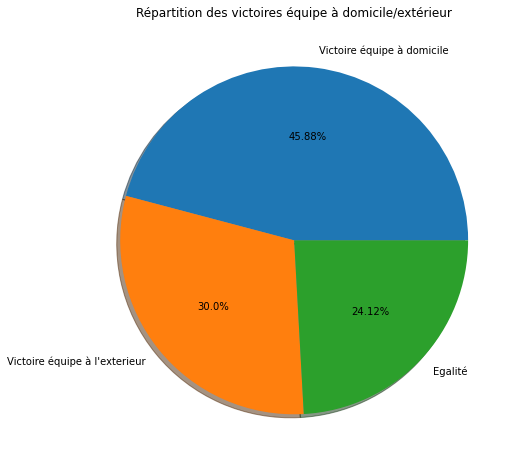

In [116]:
plt.figure(figsize=(8,8))
plt.pie(home_away, labels = ['Victoire équipe à domicile', "Victoire équipe à l'exterieur", 'Egalité'],
        autopct = lambda x: str(round(x, 2)) + '%', shadow = True);
plt.title('Répartition des victoires équipe à domicile/extérieur');

#On observe que les équipes gagnent 50% plus de matchs à domicile qu'à l'extérieur.

In [117]:
df_1718.head()

,date,team_id_home,team_name_home,team_rating_home,team_id_away,team_name_away,team_rating_away,Home_wins,Draw,Away_wins,accurate_pass_x,accurate_pass_y,aerial_lost_x,aerial_lost_y,aerial_won_x,aerial_won_y,att_goal_high_centre_x,att_goal_high_centre_y,att_goal_high_left_x,att_goal_high_left_y,att_goal_high_right_x,att_goal_high_right_y,att_goal_low_centre_x,att_goal_low_centre_y,att_goal_low_left_x,att_goal_low_left_y,att_goal_low_right_x,att_goal_low_right_y,att_miss_high_left_x,att_miss_high_left_y,att_miss_high_right_x,att_miss_high_right_y,att_miss_high_x,att_miss_high_y,att_miss_left_x,att_miss_left_y,att_miss_right_x,att_miss_right_y,att_pen_goal_x,att_pen_goal_y,att_post_high_x,att_post_high_y,att_post_left_x,att_post_left_y,att_post_right_x,att_post_right_y,att_sv_high_centre_x,att_sv_high_centre_y,att_sv_high_left_x,att_sv_high_left_y,att_sv_high_right_x,att_sv_high_right_y,att_sv_low_centre_x,att_sv_low_centre_y,att_sv_low_left_x,att_sv_low_left_y,att_sv_low_right_x,att_sv_low_right_y,blocked_scoring_att_x,blocked_scoring_att_y,fk_foul_lost_x,fk_foul_lost_y,goals_x,goals_y,ontarget_scoring_att_x,ontarget_scoring_att_y,penalty_save_x,penalty_save_y,possession_percentage_x,possession_percentage_y,post_scoring_att_x,post_scoring_att_y,shot_off_target_x,shot_off_target_y,total_offside_x,total_offside_y,total_pass_x,total_pass_y,total_scoring_att_x,total_scoring_att_y,total_tackle_x,total_tackle_y,total_throws_x,total_throws_y,won_contest_x,won_contest_y,won_corners_x,won_corners_y
id_match,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1190174,11/08/2017,13,Arsenal,7.307143,14,Leicester,6.646429,1,0,0,538,167,18,18,18,18,0,2,1,0,0,0,1,0,2,1,0,0,1,0,2,0,1,1,2,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,2,0,8,0,9,12,4,3,10,3,0,0,70.0,30.0,0,0,9,3,5,3,632,263,27,6,23,17,21,31,16,5,9,4
1190175,12/08/2017,211,Brighton,6.308571,167,Manchester City,6.902857,0,0,1,130,691,13,13,13,13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,1,0,1,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,2,0,0,0,1,2,5,6,9,0,2,2,4,0,0,21.8,78.2,0,1,2,5,6,1,213,768,6,14,10,10,18,17,7,6,3,10
1190176,12/08/2017,15,Chelsea,6.396429,184,Burnley,7.052308,0,0,1,446,241,22,17,17,22,0,0,0,1,0,1,1,0,1,1,0,0,1,0,2,0,0,0,2,2,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,2,1,0,0,0,0,7,1,16,11,2,3,6,5,0,0,61.9,38.1,0,1,6,4,2,1,521,320,19,10,10,8,13,7,5,2,8,5
1190177,12/08/2017,162,Crystal Palace,6.536154,166,Huddersfield,7.233571,0,0,1,304,199,16,18,18,16,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4,1,2,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,2,1,0,1,3,0,7,19,0,3,4,6,0,0,56.7,43.3,0,0,7,3,0,2,391,306,14,9,24,28,19,30,18,5,12,9
1190178,12/08/2017,31,Everton,6.993571,96,Stoke,6.606154,1,0,0,392,211,25,19,19,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,3,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,2,2,13,10,1,0,4,1,0,0,61.6,38.4,0,0,3,6,2,6,497,292,9,9,17,18,24,27,1,10,6,7


In [202]:
#découpage de la possession en 10 intervalles
df_1718['possession'] = pd.cut(df_1718['possession_percentage_x'],
                               bins = [20,30,40,50,60,70,80,90], labels = ['20-30','30-40','40-50','50-60','60-70','70-80','80-90']).astype('str')

In [203]:
mid = df_1718['possession']
df_1718.drop('possession', axis=1, inplace = True)
df_1718.insert(list(df_1718.columns).index('possession_percentage_x') + 1, 'possession', mid)
df_1718.head()

,date,team_id_home,team_name_home,team_rating_home,team_id_away,team_name_away,team_rating_away,Home_wins,Draw,Away_wins,accurate_pass_x,accurate_pass_y,aerial_lost_x,aerial_lost_y,aerial_won_x,aerial_won_y,att_goal_high_centre_x,att_goal_high_centre_y,att_goal_high_left_x,att_goal_high_left_y,att_goal_high_right_x,att_goal_high_right_y,att_goal_low_centre_x,att_goal_low_centre_y,att_goal_low_left_x,att_goal_low_left_y,att_goal_low_right_x,att_goal_low_right_y,att_miss_high_left_x,att_miss_high_left_y,att_miss_high_right_x,att_miss_high_right_y,att_miss_high_x,att_miss_high_y,att_miss_left_x,att_miss_left_y,att_miss_right_x,att_miss_right_y,att_pen_goal_x,att_pen_goal_y,att_post_high_x,att_post_high_y,att_post_left_x,att_post_left_y,att_post_right_x,att_post_right_y,att_sv_high_centre_x,att_sv_high_centre_y,att_sv_high_left_x,att_sv_high_left_y,att_sv_high_right_x,att_sv_high_right_y,att_sv_low_centre_x,att_sv_low_centre_y,att_sv_low_left_x,att_sv_low_left_y,att_sv_low_right_x,att_sv_low_right_y,blocked_scoring_att_x,blocked_scoring_att_y,fk_foul_lost_x,fk_foul_lost_y,goals_x,goals_y,ontarget_scoring_att_x,ontarget_scoring_att_y,penalty_save_x,penalty_save_y,possession_percentage_x,possession,possession_percentage_y,post_scoring_att_x,post_scoring_att_y,shot_off_target_x,shot_off_target_y,total_offside_x,total_offside_y,total_pass_x,total_pass_y,total_scoring_att_x,total_scoring_att_y,total_tackle_x,total_tackle_y,total_throws_x,total_throws_y,won_contest_x,won_contest_y,won_corners_x,won_corners_y
id_match,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1190174,11/08/2017,13,Arsenal,7.307143,14,Leicester,6.646429,1,0,0,538,167,18,18,18,18,0,2,1,0,0,0,1,0,2,1,0,0,1,0,2,0,1,1,2,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,2,0,8,0,9,12,4,3,10,3,0,0,70.0,60-70,30.0,0,0,9,3,5,3,632,263,27,6,23,17,21,31,16,5,9,4
1190175,12/08/2017,211,Brighton,6.308571,167,Manchester City,6.902857,0,0,1,130,691,13,13,13,13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,1,0,1,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,2,0,0,0,1,2,5,6,9,0,2,2,4,0,0,21.8,20-30,78.2,0,1,2,5,6,1,213,768,6,14,10,10,18,17,7,6,3,10
1190176,12/08/2017,15,Chelsea,6.396429,184,Burnley,7.052308,0,0,1,446,241,22,17,17,22,0,0,0,1,0,1,1,0,1,1,0,0,1,0,2,0,0,0,2,2,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,2,1,0,0,0,0,7,1,16,11,2,3,6,5,0,0,61.9,60-70,38.1,0,1,6,4,2,1,521,320,19,10,10,8,13,7,5,2,8,5
1190177,12/08/2017,162,Crystal Palace,6.536154,166,Huddersfield,7.233571,0,0,1,304,199,16,18,18,16,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4,1,2,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,2,1,0,1,3,0,7,19,0,3,4,6,0,0,56.7,50-60,43.3,0,0,7,3,0,2,391,306,14,9,24,28,19,30,18,5,12,9
1190178,12/08/2017,31,Everton,6.993571,96,Stoke,6.606154,1,0,0,392,211,25,19,19,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,3,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,2,2,13,10,1,0,4,1,0,0,61.6,60-70,38.4,0,0,3,6,2,6,497,292,9,9,17,18,24,27,1,10,6,7


In [179]:
df_possession = df_1718.groupby('possession').agg({'Home_wins':'mean'})

,date,team_id_home,team_name_home,team_rating_home,team_id_away,team_name_away,team_rating_away,Home_wins,Draw,Away_wins,accurate_pass_x,accurate_pass_y,aerial_lost_x,aerial_lost_y,aerial_won_x,aerial_won_y,att_goal_high_centre_x,att_goal_high_centre_y,att_goal_high_left_x,att_goal_high_left_y,att_goal_high_right_x,att_goal_high_right_y,att_goal_low_centre_x,att_goal_low_centre_y,att_goal_low_left_x,att_goal_low_left_y,att_goal_low_right_x,att_goal_low_right_y,att_miss_high_left_x,att_miss_high_left_y,att_miss_high_right_x,att_miss_high_right_y,att_miss_high_x,att_miss_high_y,att_miss_left_x,att_miss_left_y,att_miss_right_x,att_miss_right_y,att_pen_goal_x,att_pen_goal_y,att_post_high_x,att_post_high_y,att_post_left_x,att_post_left_y,att_post_right_x,att_post_right_y,att_sv_high_centre_x,att_sv_high_centre_y,att_sv_high_left_x,att_sv_high_left_y,att_sv_high_right_x,att_sv_high_right_y,att_sv_low_centre_x,att_sv_low_centre_y,att_sv_low_left_x,att_sv_low_left_y,att_sv_low_right_x,att_sv_low_right_y,blocked_scoring_att_x,blocked_scoring_att_y,fk_foul_lost_x,fk_foul_lost_y,goals_x,goals_y,ontarget_scoring_att_x,ontarget_scoring_att_y,penalty_save_x,penalty_save_y,possession_percentage_x,possession_percentage_y,post_scoring_att_x,post_scoring_att_y,shot_off_target_x,shot_off_target_y,total_offside_x,total_offside_y,total_pass_x,total_pass_y,total_scoring_att_x,total_scoring_att_y,total_tackle_x,total_tackle_y,total_throws_x,total_throws_y,won_contest_x,won_contest_y,won_corners_x,won_corners_y
id_match,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1190174,11/08/2017,13,Arsenal,7.307143,14,Leicester,6.646429,1,0,0,538,167,18,18,18,18,0,2,1,0,0,0,1,0,2,1,0,0,1,0,2,0,1,1,2,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,2,0,8,0,9,12,4,3,10,3,0,0,70.0,30.0,0,0,9,3,5,3,632,263,27,6,23,17,21,31,16,5,9,4
1190175,12/08/2017,211,Brighton,6.308571,167,Manchester City,6.902857,0,0,1,130,691,13,13,13,13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,1,0,1,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,2,0,0,0,1,2,5,6,9,0,2,2,4,0,0,21.8,78.2,0,1,2,5,6,1,213,768,6,14,10,10,18,17,7,6,3,10
1190176,12/08/2017,15,Chelsea,6.396429,184,Burnley,7.052308,0,0,1,446,241,22,17,17,22,0,0,0,1,0,1,1,0,1,1,0,0,1,0,2,0,0,0,2,2,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,2,1,0,0,0,0,7,1,16,11,2,3,6,5,0,0,61.9,38.1,0,1,6,4,2,1,521,320,19,10,10,8,13,7,5,2,8,5
1190177,12/08/2017,162,Crystal Palace,6.536154,166,Huddersfield,7.233571,0,0,1,304,199,16,18,18,16,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4,1,2,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,2,1,0,1,3,0,7,19,0,3,4,6,0,0,56.7,43.3,0,0,7,3,0,2,391,306,14,9,24,28,19,30,18,5,12,9
1190178,12/08/2017,31,Everton,6.993571,96,Stoke,6.606154,1,0,0,392,211,25,19,19,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,3,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,2,2,13,10,1,0,4,1,0,0,61.6,38.4,0,0,3,6,2,6,497,292,9,9,17,18,24,27,1,10,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190534,14/10/2017,30,Tottenham,7.012857,183,Bournemouth,6.371429,1,0,0,613,169,16,19,19,16,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,1,8,1,9,7,1,0,6,1,0,0,72.9,27.1,0,0,4,3,3,1,688,254,18,5,19,11,32,19,8,2,9,5
1190536,13/12/2017,26,Liverpool,6.900714,175,West Bromwich Albion,6.990000,0,1,0,611,195,17,17,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,2,0,1,0,6,1,16,6,0,0,5,1,0,0,70.2,29.8,0,1,3,4,1,4,711,291,14,6,20,24,24,15,17,7,5,7
1190537,14/10/2017,27,Watford,6.827857,13,Arsenal,6.592857,1,0,0,365,442,30,22,22,30,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,2,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,1,3,0,8,10,2,1,2,6,0,0,46.1,53.9,0,0,6,3,1,0,465,552,11,9,15,18,19,15,6,2,2,5


50-60    0.264706
40-50    0.241176
60-70    0.182353
30-40    0.129412
70-80    0.111765
20-30    0.070588
Name: possession, dtype: float64

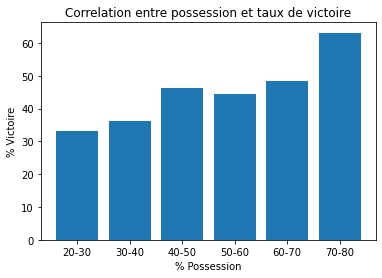

In [187]:
plt.bar(df_possession.index, df_possession['Home_wins']*100)
plt.title('Correlation entre possession et taux de victoire')
plt.xlabel('% Possession')
plt.ylabel('% Victoire')

#on observe une correlation positive entre la possession
#et le taux de victoire mais elle n'est pas très significative entre 40% et 70% de possession

df_1718['possession'].value_counts(normalize = True)
#70% des matchs ont un taux de répartition de la possession compris dans ces intervalles